# Exploratory Data Analysis

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(f'{X_train.shape=}')

X_train.shape=(60000, 28, 28)


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

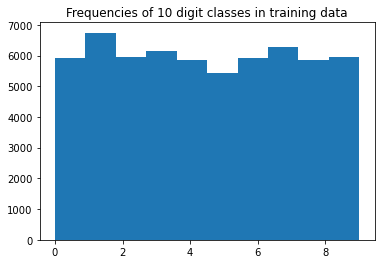

In [8]:
## This histogram shows that the 10 classes are approximately balanced in the training data
plt.title("Frequencies of 10 digit classes in training data")
plt.hist(Y_train, bins=10)

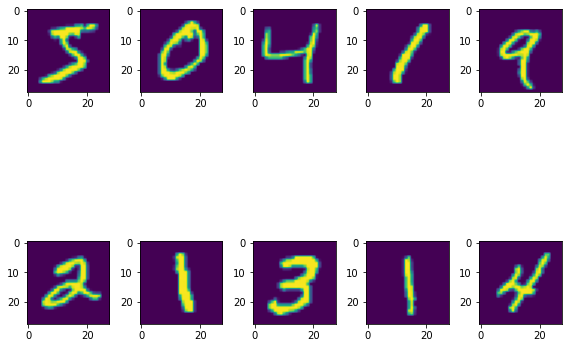

In [17]:
## Here we display the first 10 images from the training data
image_list = X_train[0:10,:,:]

def display_sample_images(image_list):

    fig, ax = plt.subplots(2, 5,figsize=(8,8))

    for i in range(0,10):
        ax = plt.subplot(2, 5, i+1)
        img = image_list[i]
        ax.imshow(img)

    plt.tight_layout()
    
display_sample_images(image_list)

(47040000,)


(array([3.8045844e+07, 2.2896000e+04, 3.3653000e+04, 3.6040000e+04,
        3.8267000e+04, 3.9148000e+04, 3.7692000e+04, 3.8856000e+04,
        3.0878000e+04, 3.8234000e+04, 3.5282000e+04, 3.6020000e+04,
        3.0139000e+04, 4.0100000e+04, 2.6939000e+04, 2.8869000e+04,
        2.9115000e+04, 2.7551000e+04, 2.6849000e+04, 3.4431000e+04,
        2.9955000e+04, 3.5496000e+04, 2.6750000e+04, 2.2910000e+04,
        2.5950000e+04, 2.9995000e+04, 2.4260000e+04, 2.4025000e+04,
        2.5434000e+04, 3.7160000e+04, 2.2913000e+04, 2.6205000e+04,
        2.8890000e+04, 1.5556000e+04, 1.9906000e+04, 2.1516000e+04,
        2.2128000e+04, 2.4760000e+04, 2.5922000e+04, 1.8250000e+04,
        2.0675000e+04, 2.7023000e+04, 2.2349000e+04, 2.1227000e+04,
        1.9030000e+04, 2.1122000e+04, 1.7326000e+04, 2.4237000e+04,
        2.0083000e+04, 1.7919000e+04, 2.3964000e+04, 2.5003000e+04,
        1.4588000e+04, 1.9230000e+04, 1.8195000e+04, 1.8068000e+04,
        2.3511000e+04, 3.1905000e+04, 1.4330000e

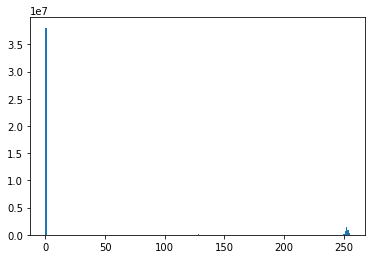

In [18]:
## We can also look at the distibution of (black and white) pixel values in the training data
data = X_train.reshape(-1)
print(data.shape)

plt.hist(data, bins = 256)

In [21]:
## From the histogram above it looks like most of the pixel values are zero, with
## a smaller spike near 255. We can print out the counts of each distint pixel value also.
bins = np.zeros(256)
for i in range(len(data)):
    bins[data[i]] += 1
    
for j in range(256):
    if bins[j] > 0:
        print(f'pixel value = {j}, count= {bins[j]}')
    

pixel value = 0, count= 38045844.0
pixel value = 1, count= 22896.0
pixel value = 2, count= 33653.0
pixel value = 3, count= 36040.0
pixel value = 4, count= 38267.0
pixel value = 5, count= 39148.0
pixel value = 6, count= 37692.0
pixel value = 7, count= 38856.0
pixel value = 8, count= 30878.0
pixel value = 9, count= 38234.0
pixel value = 10, count= 35282.0
pixel value = 11, count= 36020.0
pixel value = 12, count= 30139.0
pixel value = 13, count= 40100.0
pixel value = 14, count= 26939.0
pixel value = 15, count= 28869.0
pixel value = 16, count= 29115.0
pixel value = 17, count= 27551.0
pixel value = 18, count= 26849.0
pixel value = 19, count= 34431.0
pixel value = 20, count= 29955.0
pixel value = 21, count= 35496.0
pixel value = 22, count= 26750.0
pixel value = 23, count= 22910.0
pixel value = 24, count= 25950.0
pixel value = 25, count= 29995.0
pixel value = 26, count= 24260.0
pixel value = 27, count= 24025.0
pixel value = 28, count= 25434.0
pixel value = 29, count= 37160.0
pixel value = 30,

## Data Loading Convenience Functions:

Two data loading functions are shown here but are also stored in separate python scripts:
    
1. load_mnist_dataset_flat.py -- loads and flattens the MNIST training and test sets for training dense networks

1. load_mnist_dataset.py -- loads the MNIST data as 2 D images for the CNN networks. Also controls the split between a training and validation set, to allow training with different sample sizes.

In [1]:
import tensorflow as tf
from tensorflow import keras
## script load_mnist_dataset_flat.py
def load_mnist_dataset_flat():
    """
    Load the MNIST data set consisting of handwritten single digit images 0-9
    formatted as 28 x 28 pixels with one channel (black and white)
    60000 images are for training
    10000 images are for testing
    This function reshapes the images as flattened 784 byte arrays
    The image bytes are normalized as float in [0,1]
    Y_train and Y_test are one-hot encoded for the 10 digit classes
    returns X_train, X_test, Y_train, Y_test
    """
    DIGIT_CLASSES = 10
    RESHAPED = 28 * 28 ## 784 pixels per image
    mnist = keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    #X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
    RESHAPED = 784
    #
    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    #normalize in [0,1]
    X_train /= 255
    X_test /= 255
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    #one-hot
    Y_train = tf.keras.utils.to_categorical(Y_train, DIGIT_CLASSES)
    Y_test = tf.keras.utils.to_categorical(Y_test, DIGIT_CLASSES)
    return X_train, X_test, Y_train, Y_test

In [ ]:
import tensorflow as tf
from tensorflow import keras
## script load_mnist_dataset.py
def load_mnist_dataset(train_size=10000, flatten=True):
    """
    Load the MNIST data set consisting of handwritten single digit images 0-9
    formatted as 28 x 28 pixels with one channel (black and white)
    60000 images are for training
    10000 images are for testing
    This function reshapes the images as flattened 784 byte arrays, if needed
    The image bytes are normalized as float in [0,1]
    Y_train and Y_test are one-hot encoded for the 10 digit classes
    returns X_train, X_test, Y_train, Y_test
    """
    DIGIT_CLASSES = 10
    mnist = keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    #
    if flatten:
        #X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
        RESHAPED = 784
        X_train = X_train.reshape(60000, RESHAPED)
        X_test = X_test.reshape(10000, RESHAPED)
    else:
        # Retain 2D image shape for CNN
        X_train = X_train.reshape((60000, 28, 28, 1))
        X_test = X_test.reshape((10000, 28, 28, 1))

            
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    #normalize in [0,1]
    X_train /= 255
    X_test /= 255

    #one-hot
    Y_train = tf.keras.utils.to_categorical(Y_train, DIGIT_CLASSES)
    Y_test = tf.keras.utils.to_categorical(Y_test, DIGIT_CLASSES)
    ## Split off a smaller training sample of specified size and use
    ## the remainder of the training data as a validation set
    X_valid = X_train[train_size:]
    Y_valid = Y_train[train_size:]
    X_train = X_train[:train_size]
    Y_train = Y_train[:train_size]
    print(X_train.shape[0], 'train samples')
    print(X_valid.shape[0], 'validation samples')
    print(X_test.shape[0], 'test samples')
    
    return X_train, X_valid, X_test, Y_train, Y_valid, Y_test

In [1]:
%run load_mnist_dataset_flat.py
X_train, X_test, Y_train, Y_test = load_mnist_dataset_flat()

60000 train samples
10000 test samples


In [3]:
%run load_mnist_dataset.py
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_mnist_dataset()

10000 train samples
50000 validation samples
10000 test samples
